<div>
<img src="./sharif.png"
alt="SUT logo" width=150 height=150 align=left class="saturate">
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Linear Algebra <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Winter 2024 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Introduction to Numpy <br> <br>
<font color=686880 size=4>
    TAs: Alireza Ghazanfari - Milad Hosseini - Ali Sadeghi - Aref Zarezadeh - Mazdak Teymourian - Reza Haidari
    
____

<div>

*   List item
*   List item


<font face="Times New Roman">
<div dir=ltr align=left>
<font color=686880 size=4>
    Name:
    <br>
    Student No.:

Welcome to your first practical homework assignment for the Linear Algebra course! Congratulations on embarking on this mathematical journey. In this course, you will explore the fundamental concepts and techniques that underpin a vast array of mathematical and real-world applications.

As you delve into your first set of practical exercises, remember that every problem presents an opportunity for growth and understanding. Approach each question with curiosity and enthusiasm, and don't be afraid to make mistakes—they're an essential part of the learning process.

This assignment serves as an introduction to NumPy, <b> emphasizing the exclusion of iterative operations such as 'for' loops for processing NumPy arrays, with the exception of obtaining inputs, which is permissible.

In [ ]:
# Imports
import cv2
# for google colab
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import timeit
import matplotlib.image as mpimg
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Processing

In this section, First you should load an image and convert it to a gray scaled image then we'll process it by some operations using numpy.

In [ ]:
# read and show the image
image = cv2.imread('/content/drive/My Drive/PR1/R.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
# another way to load image by pyplot
# image = np.asarray(Image.open('./R.jpeg'))
# plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

<b> From now on, you must work with the grayscale image in each cell.

In gray scaled 0 means black and 255 is white and each number between these two shows a color in range of black to white. Now for this task, Make pixels brighter than 150, 100 degree darker.

In [ ]:
# TODO: don't use loop or anything like that and try to code by numpy where
threshold=150
darkening_factor=100
darker_image = np.where(gray_image > threshold, np.maximum(0, gray_image - darkening_factor), gray_image)
cv2_imshow(darker_image)

Output hidden; open in https://colab.research.google.com to view.

In grayscale images, pixel values typically range from 0 to 255, where 0 represents black and 255 represents white. subtracting each pixel value from 255 effectively produces the negative of the grayscale image. Now we want to create negative grayscale version of our image.

In [ ]:
# TODO: Create negative grayscale image
negative_grayscale_image = 255-gray_image
cv2_imshow(negative_grayscale_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# TODO: Split the image horizontally into two equal parts using NumPy's split function.
upper_half, lower_half = np.vsplit(gray_image,2)
cv2_imshow(upper_half)
print("\n")
cv2_imshow(lower_half)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# TODO: Split the image vertically into two equal parts using indexes and slicing.
#split_index = image.shape[1] // 2  # Use the shape of the second dimension
#left_half, right_half = gray_image[:, :split_index], gray_image[:, split_index:]
left_half, right_half = np.hsplit(gray_image,2)
cv2_imshow(left_half)
print("\n")
cv2_imshow(right_half)

Output hidden; open in https://colab.research.google.com to view.

now i need 4 vertical split (vsplit) from image. write code in a way that could be used for each image (not hard code size).

In [ ]:
# TODO: Split the image vertically into four equal parts using numpy vsplit function.
part1, part2, part3, part4 = np.vsplit(gray_image, 4)
cv2_imshow(part1)
print("\n")
cv2_imshow(part2)
print("\n")
cv2_imshow(part3)
print("\n")
cv2_imshow(part4)

Output hidden; open in https://colab.research.google.com to view.

In this section first split the original image horizontally calling them left and right images

In [ ]:
#TODO split image
left,right = np.hsplit(image,2)

In [ ]:
cv2_imshow(left)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cv2_imshow(right)

Output hidden; open in https://colab.research.google.com to view.

Now, using  invert the left image.

In [ ]:
#TODO: invert left
inverted_left = 255 - left
cv2_imshow(inverted_left)

Output hidden; open in https://colab.research.google.com to view.

Now, mirror both the inverted left image and the right image.

In [ ]:
#TODO: flip inverted left image
mirrored_left= inverted_left[:, ::-1]
cv2_imshow(mirrored_left)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#TODO: flip right image
mirrored_right = right[:, ::-1]

cv2_imshow(mirrored_right)

Output hidden; open in https://colab.research.google.com to view.

In the next step we want to concat the two images horizontally.

In [ ]:
#TODO: concat mirrored_left and mirrored_right
final_image  = np.concatenate((mirrored_left, mirrored_right), axis=1)
cv2_imshow(final_image)

Output hidden; open in https://colab.research.google.com to view.

For the final step invert the concated image.

In [ ]:
#TODO: invert final_image
invert_final_image = 255-final_image
cv2_imshow(invert_final_image)

Output hidden; open in https://colab.research.google.com to view.

###Broadcasting###

In this question, we have several vectors. From them, we want to find a vector that is most similar to a specific vector.

In order to compare how "similar" two vectors are, we define the D parameter like below (a and b are the two vectors we want to compare, with n indices). the smaller the value of D for 2 vectors is, the more similar those two vectors are.

$D=\sqrt{\Sigma_{i=1}^n(a_i-b_i)^2}$

Inputs: in the first line the users gives the value m, which is the number of vectors. In each of the next m lines, the user will give a vector as the input. In the next line, the users gives the vector v.

You are expected to find the closest vector to v.

In [ ]:
#in this cell, you should only get the inputs


#TODO: get the number m
m = int(input())
#TODO: get m vectors
vectors = np.array([list(map(int, input().split())) for _ in range(m)])
#TODO: get the vector v
v = np.array(list(map(int, input().split())))

3
1 5 10
6 8 12
0 5 10
1 6 10


In [ ]:
#in this cell you should find the expected output. you are not allowed to use loops in this cell.

def calculate_D(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))
#TODO: find the difference of all vectors with v
#TODO: compute D for each vector
distances = calculate_D(vectors, v)
#TODO: find the vector with the lowest D
closest_index = np.argmin(distances)
closest_vector = vectors[closest_index]
#TODO: print the most similar vector
print(closest_vector)

[ 1  5 10]


# Shear Images and find similarity

In [ ]:
!wget https://img.freepik.com/free-photo/cat-sneaking-look-from-white-screen_60438-3711.jpg -O image.jpg

--2024-04-18 17:15:07--  https://img.freepik.com/free-photo/cat-sneaking-look-from-white-screen_60438-3711.jpg
Resolving img.freepik.com (img.freepik.com)... 23.220.246.50, 23.220.246.25, 2600:1407:a800::1737:dc8a, ...
Connecting to img.freepik.com (img.freepik.com)|23.220.246.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28889 (28K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  28.21K  --.-KB/s    in 0s      

2024-04-18 17:15:08 (115 MB/s) - ‘image.jpg’ saved [28889/28889]



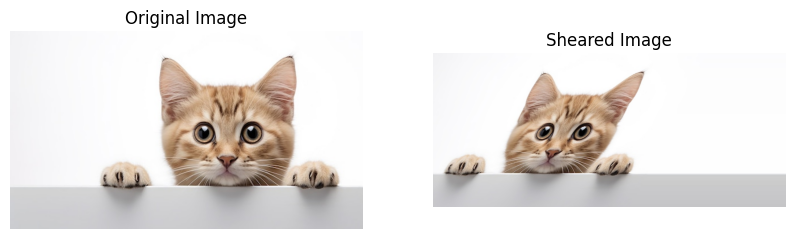

In [ ]:
# Load the image
image = mpimg.imread('image.jpg')

# Get the dimensions of the image
rows, cols, _ = image.shape

# Calculate the sheared image dimensions
shear_factor = 0.5
sheared_cols = int(cols + abs(shear_factor) * rows)

# Define the shear matrix
shear_matrix = np.array([[1, shear_factor, 0],
                          [0, 1, 0],
                          [0, 0, 1]])

# Create a grid of indices
x, y = np.meshgrid(np.arange(sheared_cols), np.arange(rows))
ones = np.ones_like(x)

# Flatten the grid of indices
indices = np.vstack((x.flatten(), y.flatten(), ones.flatten()))

# TODO: Apply the shear matrix to the indices using dot product
sheared_indices=np.dot(shear_matrix,indices)


# Reshape the indices back to their original grid shape
sheared_indices = sheared_indices[:2, :].reshape(2, rows, sheared_cols)


# TODO: Clip indices to stay within image bounds and Map the sheared indices to the original image
sheared_indices[0] = np.clip(sheared_indices[0], 0, cols - 1)
sheared_indices[1] = np.clip(sheared_indices[1], 0, rows - 1)



#TODO: Map the sheared indices to the original image

# Convert indices to integers
sheared_x_indices = sheared_indices[0].astype(int)
sheared_y_indices = sheared_indices[1].astype(int)

sheared_coordinates = np.stack((sheared_y_indices, sheared_x_indices), axis=-1)
sheared_image = np.zeros_like(image)
sheared_image = image[sheared_coordinates[:,:,0], sheared_coordinates[:,:,1]]

# Display the original and sheared images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image')
plt.axis('off')

plt.show()


Find the similarity between the 2 images by dot product. Why isn't the similarity high?

In [ ]:
# Resize the sheared image to match the size of the original image
sheared_image_resized = cv2.resize(sheared_image, (cols, rows))

# TODO: Flatten the original and resized sheared images into vectors
image_vector = image.flatten()
sheared_resized_vector=sheared_image_resized.flatten()

# TODO: Calculate the dot product between the two vectors and normalize it
# Calculate the dot product
dot_product = np.dot(image_vector, sheared_resized_vector)

# Calculate the magnitudes of the vectors
magnitude1 = np.linalg.norm(image_vector)
magnitude2 = np.linalg.norm(sheared_resized_vector)

# Normalize the dot product
similarity = dot_product / (magnitude1 * magnitude2)

print(f"Similarity between the original and sheared images: {similarity}")


Similarity between the original and sheared images: 1.0912299934353645e-09


# Graph Theory

In graph theory, a matrix is associated with each graph, which is called the adjacency matrix of that graph.
The definition of the adjacency matrix of a graph is that if our graph is given with a set of vertices
$V=\{v_1, ..., v_n\}$,
then the corresponding matrix
$A_{n\times n} = [a_{ij}]$
will be such that
$a_{ij} = 1$
if and only if vertices
$v_i$
and
$v_j$
are connected by an edge, otherwise
$a_{ij} = 0$.
Now, we want to define some types of multiplication for two graphs and ask you to find the adjacency matrix product of two arbitrary graphs using your knowledge of
$numpy$
and the adjacency matrices of the graphs.

The first type of multiplication is the tensor or Category product of two graphs. Its definition is as follows: if we consider two graphs
$G$
and
$H$
in such a way that
$V(G) = \{x_1, ..., x_n\}$
and
$V(H) = \{y_1, ..., y_m\}$,
then the category product of these two graphs, denoted by
$G\times H$,
has a vertex set defined as
$V(G\times H) = V(G) \times V(H)$,
and we connect two vertices
$(x_i, y_j)$
and
$(x_{i'}, y_{j'})$
if and only if
$y_jy_{j'} \in E(H)$
or
$x_ix_{i'} \in E(G)$.

Now, we ask you to obtain the adjacency matrix of the Cartesian product of two graphs by taking the adjacency matrices of those graphs and applying the defined connections.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Create example graphs
# You can test your code by edit this section
graph_A = nx.Graph([(1, 2), (2, 3)])
graph_B = nx.Graph([(4, 5), (5, 6)])

# Get adjacency matrices
matrix_A = nx.linalg.graphmatrix.adjacency_matrix(graph_A).todense()
matrix_B = nx.linalg.graphmatrix.adjacency_matrix(graph_B).todense()

print("Adjacency Matrix A:")
print(matrix_A)
print("\nAdjacency Matrix B:")
print(matrix_B)

Adjacency Matrix A:
[[0 1 0]
 [1 0 1]
 [0 1 0]]

Adjacency Matrix B:
[[0 1 0]
 [1 0 1]
 [0 1 0]]


In [14]:
def category_product(matrix_A, matrix_B):
  # Get the number of vertices in each graph
  num_verticesA = matrix_A.shape[0]
  num_verticesB = matrix_B.shape[0]

  # Initialize the adjacency matrix of the result matrice
  result_matrix = np.zeros((num_verticesA * num_verticesB, num_verticesA * num_verticesB), dtype=int)

  #iterating over all possible pars (of pairs)
  for i in range(num_verticesA):
    for j in range(num_verticesB):
      for i_prime in range(num_verticesA):
        for j_prime in range(num_verticesB):
          # condition for the connection in categorial graph:
          if ((matrix_A[i, i_prime] == 1) or (matrix_B[j, j_prime] == 1)):
            result_matrix[i * num_verticesB + j, i_prime * num_verticesB + j_prime] = 1
  return result_matrix
  pass


result_matrix = category_product(matrix_A, matrix_B)
print("Adjacency matrix of category product of A and B:")
print(result_matrix)

Adjacency matrix of category product of A and B:
[[0 1 0 1 1 1 0 1 0]
 [1 0 1 1 1 1 1 0 1]
 [0 1 0 1 1 1 0 1 0]
 [1 1 1 0 1 0 1 1 1]
 [1 1 1 1 0 1 1 1 1]
 [1 1 1 0 1 0 1 1 1]
 [0 1 0 1 1 1 0 1 0]
 [1 0 1 1 1 1 1 0 1]
 [0 1 0 1 1 1 0 1 0]]


To better understand this matter, we illustrate the graphs:

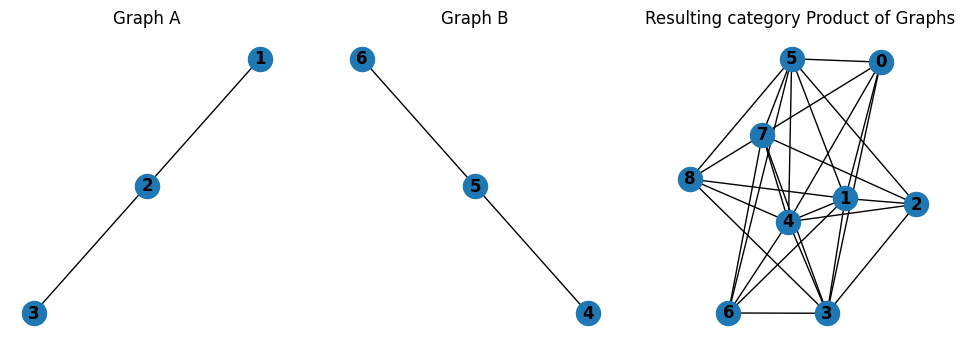

In [13]:
# Create graphs from matrices
graph_result = nx.Graph(result_matrix)

# Visualize original graphs and the resulting graph
plt.figure(figsize=(12, 4))

plt.subplot(131)
nx.draw(graph_A, with_labels=True, font_weight='bold')
plt.title('Graph A')

plt.subplot(132)
nx.draw(graph_B, with_labels=True, font_weight='bold')
plt.title('Graph B')

plt.subplot(133)
nx.draw(graph_result, with_labels=True, font_weight='bold')
plt.title('Resulting category Product of Graphs ')

plt.show()

The second type of multiplication is the Cartesian product of two graphs, denoted as $G\square H$. If we consider two graphs $G$ and $H$ with vertex sets $V(G) = \{x_1, ..., x_n\}$ and $V(H) = \{y_1, ..., y_m\}$, then the Cartesian product of these two graphs is represented by $G\square H$, and its vertex set is defined as $V(G\square H) = V(G) \times V(H)$. We connect two vertices $(x_i, y_j)$ and $(x_{i'}, y_{j'})$ if and only if $y_jy_{j'} \in E(H)$ and $i = i'$ or $x_ix_i' \in E(G)$ and $j = j'$.

Now, we ask you to obtain the adjacency matrix of the Cartesian product of two graphs by taking the adjacency matrices of those graphs and applying the defined connections.

In [15]:
def cartesian_product(matrix_A, matrix_B):
  # Get the number of vertices in each graph
  num_verticesA = matrix_A.shape[0]
  num_verticesB = matrix_B.shape[0]

  # Initialize the adjacency matrix of the result matrice
  result_matrix = np.zeros((num_verticesA * num_verticesB, num_verticesA * num_verticesB), dtype=int)

  #iterating over all possible pars (of pairs)
  for i in range(num_verticesA):
    for j in range(num_verticesB):
      for i_prime in range(num_verticesA):
        for j_prime in range(num_verticesB):
          # condition for the connection in cartesian graph:
          if (matrix_A[i, i_prime] == 1 and j==j_prime) or (matrix_B[j, j_prime] == 1 and i==i_prime):
            result_matrix[i * num_verticesB + j, i_prime * num_verticesB + j_prime] = 1
  return result_matrix
  pass

result_matrix = cartesian_product(matrix_A, matrix_B)
print("Adjacency matrix of cartesian product of G and H:")
print(result_matrix)

Adjacency matrix of cartesian product of G and H:
[[0 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 0]
 [0 0 1 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


To better understand this matter, we illustrate the graphs:

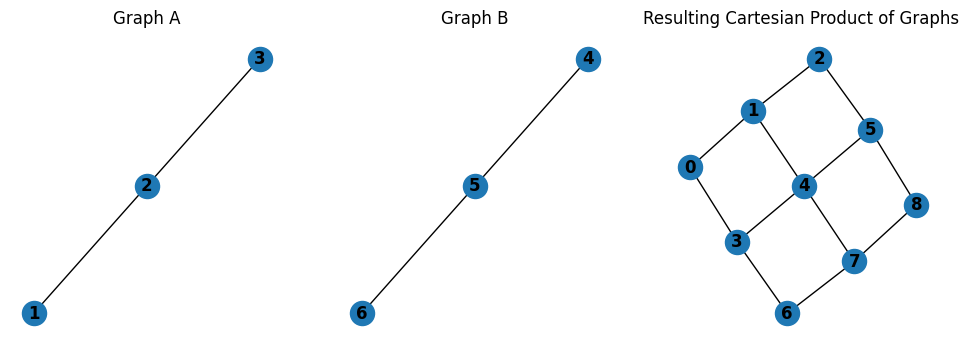

In [16]:
# Create graphs from matrices
graph_result = nx.Graph(result_matrix)

# Visualize original graphs and the resulting graph
plt.figure(figsize=(12, 4))

plt.subplot(131)
nx.draw(graph_A, with_labels=True, font_weight='bold')
plt.title('Graph A')

plt.subplot(132)
nx.draw(graph_B, with_labels=True, font_weight='bold')
plt.title('Graph B')

plt.subplot(133)
nx.draw(graph_result, with_labels=True, font_weight='bold')
plt.title('Resulting Cartesian Product of Graphs ')

plt.show()

# Vectorization, Rotation and Introduction to pandas
Face Data

In [18]:
Face1 = np.array([[-64.0, 39.0], [-63.0, 21.0], [-60.0, 3.0], [-57.0, -14.0], [-51.0, -31.0],
                  [-42.0, -47.0], [-30.0, -60.0], [-16.0, -70.0], [-1.0, -73.0], [15.0, -71.0],
                  [29.0, -60.0], [42.0, -48.0], [52.0, -32.0], [58.0, -16.0], [62.0, 2.0],
                  [64.0, 20.0], [64.0, 38.0], [-53.0, 47.0], [-45.0, 57.0], [-33.0, 60.0],
                  [-19.0, 60.0], [-7.0, 56.0], [8.0, 57.0], [20.0, 60.0], [33.0, 61.0],
                  [46.0, 56.0], [53.0, 47.0], [1.0, 42.0], [1.0, 28.0], [1.0, 14.0], [2.0, 0.0],
                  [-14.0, -7.0], [-7.0, -10.0], [1.0, -12.0], [9.0, -10.0], [16.0, -7.0],
                  [-39.0, 38.0], [-32.0, 41.0], [-24.0, 42.0], [-17.0, 37.0], [-24.0, 36.0],
                  [-32.0, 36.0], [17.0, 37.0], [24.0, 42.0], [32.0, 41.0], [40.0, 38.0],
                  [33.0, 35.0], [24.0, 35.0], [-25.0, -31.0], [-15.0, -28.0], [-6.0, -26.0],
                  [-0.0, -28.0], [7.0, -26.0], [15.0, -28.0], [25.0, -30.0], [16.0, -38.0],
                  [7.0, -42.0], [-0.0, -43.0], [-7.0, -43.0], [-16.0, -39.0], [-20.0, -32.0],
                  [-6.0, -32.0], [-0.0, -33.0], [7.0, -32.0], [20.0, -31.0], [7.0, -34.0],
                  [1.0, -35.0], [-6.0, -34.0]])

Face2 = np.array([[-64.0, 41.0], [-64.0, 23.0], [-62.0, 5.0], [-60.0, -13.0], [-53.0, -31.0],
                  [-43.0, -48.0], [-31.0, -62.0], [-17.0, -74.0], [-1.0, -77.0], [16.0, -74.0],
                  [30.0, -62.0], [42.0, -47.0], [53.0, -31.0], [59.0, -14.0], [63.0, 4.0],
                  [64.0, 21.0], [65.0, 39.0], [-53.0, 46.0], [-46.0, 55.0], [-34.0, 59.0],
                  [-21.0, 59.0], [-9.0, 55.0], [9.0, 55.0], [21.0, 58.0], [34.0, 58.0],
                  [46.0, 53.0], [53.0, 43.0], [1.0, 40.0], [1.0, 25.0], [1.0, 11.0],
                  [1.0, -3.0], [-18.0, -5.0], [-9.0, -9.0], [0.0, -13.0], [10.0, -9.0],
                  [18.0, -5.0], [-40.0, 36.0], [-32.0, 38.0], [-25.0, 38.0], [-18.0, 36.0],
                  [-25.0, 35.0], [-33.0, 35.0], [18.0, 35.0], [26.0, 37.0], [33.0, 36.0],
                  [41.0, 34.0], [33.0, 33.0], [26.0, 34.0], [-35.0, -20.0], [-23.0, -20.0],
                  [-11.0, -20.0], [-1.0, -22.0], [9.0, -21.0], [20.0, -20.0], [32.0, -20.0],
                  [21.0, -38.0], [9.0, -46.0], [-1.0, -48.0], [-12.0, -46.0], [-25.0, -38.0],
                  [-31.0, -22.0], [-11.0, -24.0], [-1.0, -26.0], [9.0, -24.0], [28.0, -22.0],
                  [9.0, -37.0], [-1.0, -39.0], [-11.0, -38.0]])

Face3 = np.array([[-66.0, 36.0], [-65.0, 17.0], [-63.0, -1.0], [-59.0, -19.0], [-52.0, -37.0],
                  [-44.0, -54.0], [-33.0, -68.0], [-19.0, -78.0], [-3.0, -81.0], [13.0, -78.0],
                  [27.0, -68.0], [40.0, -56.0], [50.0, -40.0], [57.0, -23.0], [62.0, -5.0],
                  [64.0, 13.0], [65.0, 32.0], [-51.0, 58.0], [-44.0, 69.0], [-32.0, 73.0],
                  [-19.0, 73.0], [-8.0, 68.0], [12.0, 68.0], [23.0, 73.0], [36.0, 74.0],
                  [47.0, 69.0], [54.0, 58.0], [2.0, 47.0], [2.0, 34.0], [2.0, 23.0],
                  [2.0, 10.0], [-13.0, -2.0], [-6.0, -4.0], [1.0, -6.0], [7.0, -5.0],
                  [14.0, -2.0], [-39.0, 41.0], [-32.0, 46.0], [-23.0, 46.0], [-16.0, 41.0],
                  [-24.0, 39.0], [-32.0, 38.0], [18.0, 40.0], [25.0, 46.0], [34.0, 45.0],
                  [41.0, 40.0], [34.0, 37.0], [25.0, 38.0], [-20.0, -36.0], [-14.0, -27.0],
                  [-6.0, -22.0], [-1.0, -24.0], [5.0, -22.0], [12.0, -28.0], [18.0, -38.0],
                  [12.0, -48.0], [4.0, -53.0], [-2.0, -54.0], [-8.0, -53.0], [-15.0, -47.0],
                  [-16.0, -36.0], [-6.0, -29.0], [-1.0, -29.0], [4.0, -29.0], [14.0, -37.0],
                  [4.0, -43.0], [-1.0, -44.0], [-7.0, -43.0]])



TargetFace1 = np.array([[-65.2, 37.6], [-64.4, 19.0], [-62.2, 1.0], [-58.8, -16.8], [-52.0, -34.6], [-43.4, -51.4], [-32.0, -65.2], [-18.0, -75.6], [-2.2, -78.6], [14.0, -75.8], [28.0, -65.2], [40.8, -52.6], [51.0, -36.6], [57.6, -19.8], [62.2, -1.8], [64.0, 16.0], [64.8, 34.6], [-51.8, 53.4], [-44.6, 63.8], [-32.6, 67.6], [-19.4, 67.6], [-8.0, 63.0], [10.6, 63.2], [22.0, 67.4], [35.0, 68.2], [46.6, 63.2], [53.6, 52.8], [1.6, 44.6], [1.6, 31.0], [1.6, 18.8], [1.8, 5.4], [-14.2, -3.6], [-6.8, -6.2], [0.8, -8.6], [8.0, -6.8], [15.2, -3.6], [-39.2, 39.4], [-32.0, 43.4], [-23.6, 43.6], [-16.6, 39.2], [-24.2, 37.6], [-32.2, 37.0], [17.8, 38.4], [25.0, 43.4], [33.4, 42.4], [40.8, 38.4], [33.6, 35.8], [25.0, 36.6], [-24.0, -31.8], [-16.0, -25.8], [-7.0, -22.4], [-0.8, -24.4], [6.2, -22.6], [14.2, -26.4], [22.2, -32.8], [14.6, -44.0], [5.6, -49.4], [-1.4, -50.6], [-8.6, -49.6], [-17.2, -43.6], [-19.8, -32.4], [-7.0, -28.6], [-0.8, -29.2], [5.6, -28.6], [18.0, -32.8], [5.6, -40.0], [-0.6, -41.2], [-7.6, -40.2]])

TargetFace2 = np.array([[-77.6, 46.6], [-76.9, 24.6], [-74.2, 3.0], [-70.7, -18.3], [-62.6, -39.6], [-51.7, -59.7], [-37.7, -76.2], [-20.9, -89.2], [-2.0, -92.8], [17.7, -89.5], [34.5, -76.2], [49.6, -60.3], [62.1, -41.1], [69.7, -21.0], [74.9, 0.6], [76.8, 21.7], [77.7, 43.7], [-62.8, 60.3], [-54.1, 72.2], [-39.7, 76.7], [-23.8, 76.7], [-9.8, 71.5], [11.7, 71.8], [25.7, 76.2], [41.3, 76.9], [55.6, 70.9], [64.0, 58.8], [1.6, 51.4], [1.6, 34.5], [1.6, 18.9], [1.9, 2.5], [-18.4, -5.4], [-9.0, -9.1], [0.7, -12.5], [10.5, -9.5], [19.4, -5.4], [-47.3, 45.8], [-38.4, 49.7], [-28.9, 50.0], [-20.5, 45.5], [-29.3, 43.9], [-38.9, 43.5], [21.3, 44.6], [30.2, 49.5], [39.7, 48.3], [48.9, 44.4], [40.0, 41.8], [30.2, 42.7], [-33.0, -33.7], [-21.6, -29.2], [-9.7, -26.6], [-0.9, -29.0], [8.6, -27.1], [19.3, -29.6], [30.7, -34.2], [20.1, -49.6], [8.2, -56.8], [-1.3, -58.5], [-11.3, -57.1], [-23.3, -49.5], [-27.9, -35.0], [-9.7, -33.2], [-0.9, -34.5], [8.2, -33.2], [25.6, -35.1], [8.2, -45.9], [-0.6, -47.6], [-10.1, -46.4]])



edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
         (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16),
         (17, 18), (18, 19), (19, 20), (20, 21),
         (22, 23), (23, 24), (24, 25), (25, 26),
         (27, 28), (28, 29), (29, 30), (30, 33), (31, 32), (32, 33), (33, 34), (34, 35),
         (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 36),
         (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 42),
         (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54),
         (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 48),
         (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67,60)]



----------------------------------------------------------------------
use the face data and perform the rotation by multiplying the rotation matrix and plot the final result, you can use the plot function provided below (select your favorite angle for rotation).

In [19]:
def plot_face(plt,X,edges,color='b'):
    "plots a face"
    plt.plot(X[:,0], X[:,1], 'o', color=color)
    for i,j in edges:
        xi,yi = X[i]
        xj,yj = X[j]
        plt.plot((xi,xj), (yi,yj), '-', color=color)
        plt.axis('square')
        plt.xlim(-100,100)
        plt.ylim(-100,100)

Example of ploting face data using plot_face function

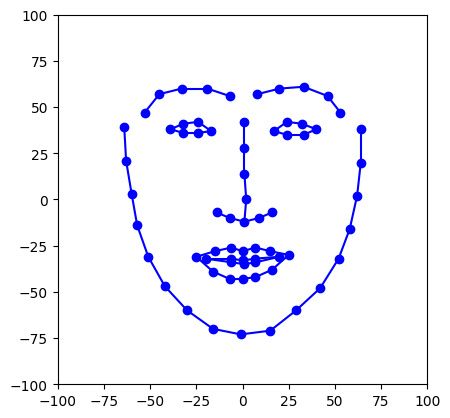

In [20]:
plot_face(plt, Face1, edges, color='b')
plt.show()

complete the code below

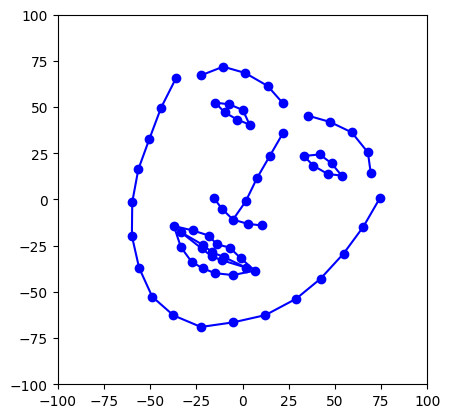

In [21]:
# TODO
# your code here
def rotate_graph(matrix, angle):
#NOTE: THE ROTATION IS CLOCKWISE
  #angle in radians:
  theta=np.radians(-angle)

  #the rotation matrix for a 2_D graph:
  rotation_matrix= np.array([[np.cos(theta), -np.sin(theta)],
                             [np.sin(theta), np.cos(theta)]])

  # Get the number of nodes
  num_nodes = matrix.shape[0]

  # Initialize the rotated nodes matrix
  rotated_nodes = np.zeros_like(matrix)

  # Iterate over all nodes
  for i in range(num_nodes):
    # Compute the coordinates of the rotated node
    rotated_coordinates = np.dot(rotation_matrix, matrix[i])

    # Store the rotated coordinates
    rotated_nodes[i] = rotated_coordinates

  return rotated_nodes
  pass

X=rotate_graph(Face1, 30)
# end of your code
plot_face(plt, X, edges, color='b')
plt.show()

<b> Vectorization: </b>
Replace For loop with a single line comand and compare excutation time

In [37]:
m,n,p = 100,50, 2000
A = np.random.rand(m,n,p)
s = np.random.rand(p)
for i in range(p):
    A[:,:,i] *= s[i]

in the code below you can see how to calculate excutation time in python, craete op2() and compare the time excutation

In [45]:
import timeit
m,n,p = 100,50, 2000

A = np.random.rand(m,n,p)
B = np.random.rand(m, n, p)
s = np.random.rand(p)

def op1():
    for i in range(p):
        A[:,:,i] *= s[i]

def op2():
    global B
    B *= s

t1 = timeit.timeit(op1,number=1)
t2=  timeit.timeit(op2,number=1)
print (t1)
print(t2)

0.11074149999876681
0.013308171000971925


Use the pandas dataframe to load the grades.csv file and calculate average of each student and sort them by average and save in the sorted_gardes.csv file

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/My Drive/PR1/grades.csv")

# Access the values of the specified columns
row_count=df.shape[0]
base=3
sum=0
k=0
avg_col=np.zeros(row_count)
#calculating each student average:
for i in range (row_count):
  for j in range (4):
    sum+= df.iloc[:, 2+j].values[i]
  avg= sum/4
  avg_col[i]=avg
  sum=0

#Adding the new average column to the dataframe:
column_name = 'Average'
df[column_name] = avg_col
# Sorting the DataFrame based on the values of the avg column:
sorted_df = df.sort_values(by=column_name, ascending=False)

#saving the new df to the csv file:
sorted_df.to_csv('sorted_grades.csv', index=False)
# print(sorted_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
